In [0]:
import keras
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers
import os,shutil
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Unzip data using python code:**
The following python code will use the OS library, giving you access to the file system, and the zipfile library allowing you to unzip the data.

In [0]:
import zipfile
local_zip = '/content/drive/My Drive/cars-wagonr-swift.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

# **Connect With Google Drive**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Let's define the directories.
Dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

In [0]:
original_dir='/content//data'
test_dir_original='/content/data/test'
train_dir_original='/content/data/train'
validation_dir_original='/content/data/validation'

In [0]:
test_dir_swift=os.path.join(test_dir_original,"swift")
test_dir_wagonr=os.path.join(test_dir_original,"wagonr")

train_dir_swift=os.path.join(train_dir_original,"swift")
train_dir_wagonr=os.path.join(train_dir_original,"wagonr")

validation_dir_swift=os.path.join(validation_dir_original,"swift")
validation_dir_wagonr=os.path.join(validation_dir_original,"wagonr")

In [0]:
def print_method():
    print("train_swift",len(os.listdir(train_dir_swift)))
    print("train_wagonR",len(os.listdir(train_dir_wagonr)))
    print("test_swift",len(os.listdir(test_dir_swift)))
    print("test_wagonR",len(os.listdir(test_dir_wagonr)))
    print("validation_swift",len(os.listdir(validation_dir_swift)))
    print("validation_wagonR",len(os.listdir(validation_dir_wagonr)))
    return

In [18]:
print(print_method())

train_swift 1200
train_wagonR 1200
test_swift 400
test_wagonR 400
validation_swift 400
validation_wagonR 400
None


# **Create Model**

In [0]:
model=tensorflow.keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        3


## **compile model:**
We train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid.We will use the rmsprop optimizer with a learning rate of 0.001. During training, we will want to monitor classification accuracy. Using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [0]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

## **Data preprocessing:**

In keras it can be done via thekeras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [0]:
train_data_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data_gen=ImageDataGenerator(rescale=1./255)
val_data_gen=ImageDataGenerator(rescale=1./255)

In [23]:
train_generator=train_data_gen.flow_from_directory(train_dir_original,target_size=(150,150),batch_size=20,class_mode='binary')
test_generator=test_data_gen.flow_from_directory(test_dir_original,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_data_gen.flow_from_directory(validation_dir_original,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## **Train Model**

In [24]:
history = model.fit_generator(train_generator,steps_per_epoch=150,epochs=10,validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
150/150 [==============================] - 146s 972ms/step - loss: 0.6804 - accuracy: 0.5697 - val_loss: 0.6518 - val_accuracy: 0.6350
Epoch 2/10
150/150 [==============================] - 144s 959ms/step - loss: 0.6071 - accuracy: 0.6717 - val_loss: 0.5147 - val_accuracy: 0.7480
Epoch 3/10
150/150 [==============================] - 144s 961ms/step - loss: 0.5342 - accuracy: 0.7340 - val_loss: 0.4573 - val_accuracy: 0.7940
Epoch 4/10
150/150 [==============================] - 144s 959ms/step - loss: 0.4342 - accuracy: 0.7950 - val_loss: 0.3558 - val_accuracy: 0.8370
Epoch 5/10
150/150 [==============================] - 144s 960ms/step - loss: 0.3615 - accuracy: 0.8317 - val_loss: 0.4011 - val_accuracy: 0.8390
Epoch 6/10
150/150 [==============================] - 144s 960ms/step - loss: 0.3289 - accuracy: 0.8527 - val_loss: 0.2621 - val_accuracy: 0.8950
Epoch 7/10
150/150 [============================

## **Evaluating Accuracy and Loss for the Model:**
Let's plot the training/validation accuracy and loss as collected during training:


In [0]:
accuracy=history.history["accuracy"]
loss=history.history['loss']
val_accuracy=history.history['val_accuracy']
val_loss=history.history['val_loss']
epochs=range(len(accuracy))

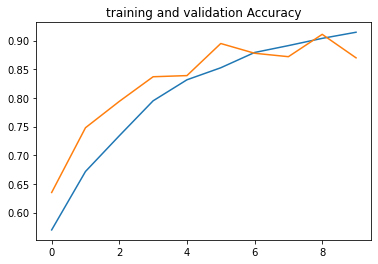

In [26]:

plt.plot(epochs,accuracy)
plt.plot(epochs,val_accuracy)
plt.title("training and validation Accuracy")
plt.show()

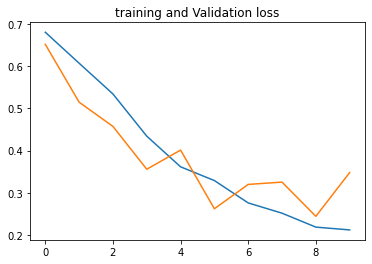

In [27]:

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title("training and Validation loss")
plt.show()

In [0]:
model.save("model.h5")

In [0]:
from tensorflow.keras.models import load_model
model=load_model("/content/model.h5")

In [40]:
test_image=image.load_img('/content/wagonr3.jpeg',target_size=(150,150))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
map=train_generator.class_indices
print(map)

if result[0][0]>0:
    predict='wagonr'
else:
    predict='swift'    

print("this image is:",predict)

{'swift': 0, 'wagonr': 1}
this image is: wagonr
